In [ ]:
import pandas as pd
import numpy as np

# Simulating traffic data
np.random.seed(42)
data = {
    'time': pd.date_range(start='2023-01-01', periods=100, freq='h'),
    'traffic_volume': np.random.randint(100, 1000, size=100),
    'accidents': np.random.choice([0, 1], size=100, p=[0.9, 0.1])
}

df = pd.DataFrame(data)
print(df.head())

                 time  traffic_volume  accidents
0 2023-01-01 00:00:00             202          0
1 2023-01-01 01:00:00             535          0
2 2023-01-01 02:00:00             960          0
3 2023-01-01 03:00:00             370          0
4 2023-01-01 04:00:00             206          0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Feature Engineering (Converting time into useful features)
df['hour'] = df['time'].dt.hour
df['day_of_week'] = df['time'].dt.dayofweek

# Define features and target
X = df[['hour', 'day_of_week']]
y = df['traffic_volume']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 95112.0634843889


In [ ]:
def control_traffic_signal(traffic_volume):
    if traffic_volume > 700:
        return "Green for 60 seconds"
    elif traffic_volume > 400:
        return "Green for 40 seconds"
    else:
        return "Green for 30 seconds"

# Simulating real-time traffic signal control
for i in range(5):
    current_volume = df.iloc[i]['traffic_volume']
    signal_time = control_traffic_signal(current_volume)
    print(f"At hour {df.iloc[i]['hour']}, traffic volume is {current_volume}. Signal: {signal_time}")

At hour 0, traffic volume is 202. Signal: Green for 30 seconds
At hour 1, traffic volume is 535. Signal: Green for 40 seconds
At hour 2, traffic volume is 960. Signal: Green for 60 seconds
At hour 3, traffic volume is 370. Signal: Green for 30 seconds
At hour 4, traffic volume is 206. Signal: Green for 30 seconds


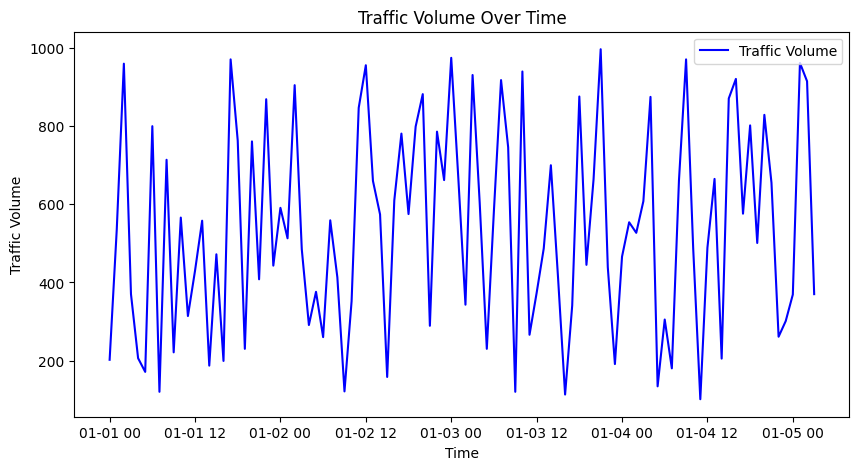

In [ ]:
import matplotlib.pyplot as plt

# Plotting traffic volume over time
plt.figure(figsize=(10, 5))
plt.plot(df['time'], df['traffic_volume'], label='Traffic Volume', color='b')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Over Time')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Simulate a larger dataset for training
np.random.seed(42)
data = {
    'time': pd.date_range(start='2023-01-01', periods=100, freq='H'),
    'traffic_volume': np.random.randint(100, 1000, size=100),
    'accidents': np.random.choice([0, 1], size=100, p=[0.9, 0.1]),
    'weather_condition': np.random.choice([0, 1], size=100, p=[0.8, 0.2]),  # 0: Clear, 1: Bad Weather
    'special_event': np.random.choice([0, 1], size=100, p=[0.95, 0.05]),   # 0: No Event, 1: Event Day
}

df = pd.DataFrame(data)

# Feature Engineering
df['hour'] = df['time'].dt.hour
df['day_of_week'] = df['time'].dt.dayofweek

# Select features for model training
X = df[['hour', 'day_of_week', 'accidents', 'weather_condition', 'special_event']]
y = df['traffic_volume']

# Normalize the features
scaler = StandardScaler()
a_scaled = scaler.fit_transform(X)

# Train model
model = LinearRegression()
model.fit(a_scaled, y)

# Simulate real-time data streaming
def stream_traffic_data():
    for i in range(100, 200):  # Generating new real-time data
        current_time = pd.Timestamp.now()
        current_hour = current_time.hour
        current_day_of_week = current_time.dayofweek
        current_accidents = np.random.choice([0, 1], p=[0.9, 0.1])
        current_weather = np.random.choice([0, 1], p=[0.8, 0.2])  # 0: Clear, 1: Bad Weather
        current_event = np.random.choice([0, 1], p=[0.95, 0.05])  # 0: No Event, 1: Event

        # Simulating real-time traffic volume
        current_traffic_volume = np.random.randint(100, 1000)

        # Creating a new row of traffic data
        new_data = {
            'time': current_time,
            'traffic_volume': current_traffic_volume,
            'accidents': current_accidents,
            'weather_condition': current_weather,
            'special_event': current_event,
            'hour': current_hour,
            'day_of_week': current_day_of_week
        }

        yield new_data

# Traffic signal control logic based on predicted traffic volume
def control_traffic_signal(traffic_volume):
    if traffic_volume > 700:
        return "Green for 60 seconds"
    elif traffic_volume > 400:
        return "Green for 40 seconds"
    else:
        return "Green for 30 seconds"

# Real-time processing
def real_time_processing():
    for new_data in stream_traffic_data():
        print(f"\nReal-time Traffic Data: {new_data}")

        # Prepare the data for prediction (use scaler for consistency)
        a_new_df = [[
            new_data['hour'],
            new_data['day_of_week'],
            new_data['accidents'],
            new_data['weather_condition'],
            new_data['special_event']
        ]]
        a_new_scaled = scaler.transform(a_new_df)

        # Predict future traffic volume using the real-time data
        predicted_traffic_volume = model.predict(a_new_scaled)[0]

        print(f"Predicted Traffic Volume: {predicted_traffic_volume:.2f}")

        # Control traffic signal based on predicted volume
        signal_time = control_traffic_signal(predicted_traffic_volume)
        print(f"At hour {new_data['hour']}, control signal: {signal_time}")

        # Sleep for 1 second to simulate real-time delay
        time.sleep(1)

# Run real-time processing simulation
real_time_processing()

<ipython-input-14-a88f463e55f0>:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'time': pd.date_range(start='2023-01-01', periods=100, freq='H'),
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:05.392492'), 'traffic_volume': 763, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds

Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:06.394476'), 'traffic_volume': 790, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:07.396795'), 'traffic_volume': 267, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:08.400854'), 'traffic_volume': 706, 'accidents': 1, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 574.10
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:09.403127'), 'traffic_volume': 826, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:10.407403'), 'traffic_volume': 701, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:11.408939'), 'traffic_volume': 925, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:12.411452'), 'traffic_volume': 519, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:13.415449'), 'traffic_volume': 968, 'accidents': 0, 'weather_condition': 1, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 599.01
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:14.419428'), 'traffic_volume': 647, 'accidents': 0, 'weather_condition': 1, 'special_event': 1, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 470.07
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:15.423711'), 'traffic_volume': 289, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:16.426061'), 'traffic_volume': 378, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:17.430155'), 'traffic_volume': 161, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:18.434163'), 'traffic_volume': 118, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:19.436405'), 'traffic_volume': 175, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:20.438627'), 'traffic_volume': 663, 'accidents': 0, 'weather_condition': 1, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 599.01
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:21.442620'), 'traffic_volume': 198, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:22.444858'), 'traffic_volume': 664, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:23.447957'), 'traffic_volume': 141, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:24.450499'), 'traffic_volume': 262, 'accidents': 1, 'weather_condition': 1, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 605.66
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:25.454491'), 'traffic_volume': 687, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:26.455913'), 'traffic_volume': 329, 'accidents': 0, 'weather_condition': 1, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 599.01
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:27.458257'), 'traffic_volume': 894, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:28.462474'), 'traffic_volume': 438, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:29.464686'), 'traffic_volume': 756, 'accidents': 0, 'weather_condition': 1, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 599.01
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:30.468594'), 'traffic_volume': 169, 'accidents': 1, 'weather_condition': 1, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 605.66
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:31.470952'), 'traffic_volume': 266, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:32.473245'), 'traffic_volume': 550, 'accidents': 0, 'weather_condition': 1, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 599.01
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:33.477246'), 'traffic_volume': 759, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:34.478957'), 'traffic_volume': 100, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:35.480941'), 'traffic_volume': 607, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:36.482946'), 'traffic_volume': 233, 'accidents': 0, 'weather_condition': 1, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 599.01
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:37.484948'), 'traffic_volume': 914, 'accidents': 0, 'weather_condition': 1, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 599.01
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:38.486946'), 'traffic_volume': 328, 'accidents': 0, 'weather_condition': 0, 'special_event': 1, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 438.51
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:39.489200'), 'traffic_volume': 146, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:40.491502'), 'traffic_volume': 472, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:41.495750'), 'traffic_volume': 111, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:42.498062'), 'traffic_volume': 507, 'accidents': 1, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 574.10
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:43.500339'), 'traffic_volume': 189, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:44.504271'), 'traffic_volume': 968, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:45.507058'), 'traffic_volume': 244, 'accidents': 1, 'weather_condition': 1, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 605.66
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:46.509332'), 'traffic_volume': 851, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:47.510957'), 'traffic_volume': 693, 'accidents': 0, 'weather_condition': 1, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 599.01
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:48.512963'), 'traffic_volume': 109, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:49.515524'), 'traffic_volume': 218, 'accidents': 1, 'weather_condition': 1, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 605.66
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:50.517763'), 'traffic_volume': 338, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:51.520051'), 'traffic_volume': 953, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:52.522305'), 'traffic_volume': 204, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:53.524537'), 'traffic_volume': 617, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:54.526837'), 'traffic_volume': 870, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:55.529100'), 'traffic_volume': 557, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:56.532961'), 'traffic_volume': 100, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:57.535600'), 'traffic_volume': 980, 'accidents': 1, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 574.10
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:58.537936'), 'traffic_volume': 650, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:23:59.539918'), 'traffic_volume': 990, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:00.543909'), 'traffic_volume': 833, 'accidents': 0, 'weather_condition': 1, 'special_event': 1, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 470.07
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:01.546182'), 'traffic_volume': 306, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:02.548377'), 'traffic_volume': 202, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:03.552381'), 'traffic_volume': 197, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:04.554654'), 'traffic_volume': 407, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:05.558976'), 'traffic_volume': 641, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:06.562912'), 'traffic_volume': 999, 'accidents': 0, 'weather_condition': 1, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 599.01
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:07.565162'), 'traffic_volume': 951, 'accidents': 0, 'weather_condition': 1, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 599.01
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:08.567412'), 'traffic_volume': 304, 'accidents': 0, 'weather_condition': 1, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 599.01
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:09.570945'), 'traffic_volume': 210, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:10.572946'), 'traffic_volume': 473, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:11.575449'), 'traffic_volume': 380, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:12.579406'), 'traffic_volume': 160, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:13.581633'), 'traffic_volume': 703, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:14.585552'), 'traffic_volume': 744, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:15.589523'), 'traffic_volume': 177, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:16.593510'), 'traffic_volume': 146, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:17.595825'), 'traffic_volume': 930, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:18.598106'), 'traffic_volume': 107, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:19.602328'), 'traffic_volume': 738, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:20.604599'), 'traffic_volume': 177, 'accidents': 1, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 574.10
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:21.607944'), 'traffic_volume': 411, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:22.609965'), 'traffic_volume': 462, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:23.612538'), 'traffic_volume': 838, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:24.614787'), 'traffic_volume': 127, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:25.618857'), 'traffic_volume': 573, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:26.622955'), 'traffic_volume': 124, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:27.625189'), 'traffic_volume': 210, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:28.627462'), 'traffic_volume': 468, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:29.629723'), 'traffic_volume': 791, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:30.632040'), 'traffic_volume': 976, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:31.634393'), 'traffic_volume': 376, 'accidents': 0, 'weather_condition': 1, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 599.01
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:32.636726'), 'traffic_volume': 942, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:33.638961'), 'traffic_volume': 236, 'accidents': 0, 'weather_condition': 1, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 599.01
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:34.640940'), 'traffic_volume': 647, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:35.643296'), 'traffic_volume': 174, 'accidents': 1, 'weather_condition': 1, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 605.66
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:36.645555'), 'traffic_volume': 603, 'accidents': 0, 'weather_condition': 1, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 599.01
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:37.647864'), 'traffic_volume': 814, 'accidents': 0, 'weather_condition': 1, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 599.01
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:38.650197'), 'traffic_volume': 425, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:39.652500'), 'traffic_volume': 631, 'accidents': 1, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 574.10
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:40.654799'), 'traffic_volume': 419, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:41.658948'), 'traffic_volume': 944, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:42.663112'), 'traffic_volume': 109, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:43.665403'), 'traffic_volume': 267, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Real-time Traffic Data: {'time': Timestamp('2024-10-07 13:24:44.667706'), 'traffic_volume': 884, 'accidents': 0, 'weather_condition': 0, 'special_event': 0, 'hour': 13, 'day_of_week': 0}
Predicted Traffic Volume: 567.45
At hour 13, control signal: Green for 40 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
